# MATH 210 Introduction to Mathematical Computing

## March 28, 2018

* Import data with pandas.read_csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data with pandas.read_csv

The most important step in data analysis is importing the data properly! Let's try an example. Go to the [Government of Canada's Open Data Portal](https://open.canada.ca/data/en/dataset?portal_type=dataset) and serach "university". The 9th result should be "Number and salaries of full-time teaching staff at canadian universities". Let's download the dataset as a `.csv`, unzip the download, upload the data to `ubc.syzygy.ca` into the same directory as this notebook, and finally import the data with `pandas.read_csv`. See the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [2]:
data = pd.read_csv('04770123-eng.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 9: invalid continuation byte

There is an encoding error. This dataset comes from the Government of Canada and there are probably some French accent characters that pandas doesn't recognize. Let's try again and specify `encoding='latin'` to pandas that there are accent characters in the data.

In [3]:
data = pd.read_csv('04770123-eng.csv',encoding='latin')

The data is imported as a pandas DataFrame. This is like a spreadsheet with column names and row index. To get a summary of the data, let's use the function `.info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 8 columns):
Ref_Date      5159 non-null object
GEO           5159 non-null object
INS           5159 non-null object
RAN           5159 non-null object
STA           5159 non-null object
Vector        5159 non-null object
Coordinate    5159 non-null object
Value         5159 non-null object
dtypes: object(8)
memory usage: 322.5+ KB


We have 5159 rows of data and 8 columns. The word `object` means text. That's fine for most of the columns since `INS` is the name of the university but `value` should be a number. Let's use the function `.head()` to see the first 5 rows of the data.

In [5]:
data.head()

,Ref_Date,GEO,INS,RAN,STA,Vector,Coordinate,Value
0,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,Total teaching staff,v113286602,1.1.2.1,294.0
1,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,Teaching staff excluded,v113286603,1.1.2.2,12.0
2,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,Average (dollars),v113286604,1.1.2.3,153550.0
3,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,Median (dollars),v113286605,1.1.2.4,151325.0
4,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,10th Percentile (dollars),v113286606,1.1.2.5,129900.0


Why is the column `Value` imported as text and not a float? Let's take a look. We can can select a column using brackets and column name.

In [6]:
data['Value']

0          294.0
1           12.0
2       153550.0
3       151325.0
4       129900.0
5       174875.0
6           42.0
7           12.0
8       159675.0
9       156425.0
10      132825.0
11      188475.0
12         252.0
13      152525.0
14      151325.0
15      129900.0
16      174875.0
17         420.0
18           6.0
19      123500.0
20      120125.0
21      108475.0
22      142750.0
23          60.0
24             x
25      130300.0
26      128750.0
27      114625.0
28      146775.0
29         363.0
          ...   
5129     88300.0
5130        54.0
5131           x
5132     82275.0
5133     85525.0
5134     68500.0
5135     88300.0
5136        12.0
5137     77700.0
5138     77700.0
5139     77700.0
5140     77700.0
5141       255.0
5142         6.0
5143     88050.0
5144     88300.0
5145     77700.0
5146     90325.0
5147       117.0
5148           x
5149     87125.0
5150     88300.0
5151     81725.0
5152     88300.0
5153       138.0
5154           x
5155     88825.0
5156     88300

Missing data in the `Value` column is represented by an `x`. We need to import the data and tell pandas that missing data is called `x`.

In [7]:
data = pd.read_csv('04770123-eng.csv',encoding='latin',na_values='x')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 8 columns):
Ref_Date      5159 non-null object
GEO           5159 non-null object
INS           5159 non-null object
RAN           5159 non-null object
STA           5159 non-null object
Vector        5159 non-null object
Coordinate    5159 non-null object
Value         4624 non-null float64
dtypes: float64(1), object(7)
memory usage: 322.5+ KB


In [9]:
data.head()

,Ref_Date,GEO,INS,RAN,STA,Vector,Coordinate,Value
0,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,Total teaching staff,v113286602,1.1.2.1,294.0
1,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,Teaching staff excluded,v113286603,1.1.2.2,12.0
2,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,Average (dollars),v113286604,1.1.2.3,153550.0
3,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,Median (dollars),v113286605,1.1.2.4,151325.0
4,2016/2017,Canada,Memorial University of Newfoundland - Includin...,Full professor,10th Percentile (dollars),v113286606,1.1.2.5,129900.0


Let's see the different entries in the columns `Ref_Date` and `GEO`.

In [10]:
data['Ref_Date'].unique()

array(['2016/2017'], dtype=object)

In [11]:
data['GEO'].unique()

array(['Canada'], dtype=object)

The columns `Ref_Date` and `GEO` have only one value so let's drop it.

In [12]:
data.drop(['Ref_Date','GEO'],axis=1,inplace=True)

The columns `Vector` and `Coordinate` look like there's a different value for each row. Let's see.

In [13]:
data['Vector'].nunique()

5159

In [14]:
data['Coordinate'].nunique()

5159

Theses columns seem to be IDs. We can drop them too.

In [15]:
data.drop(['Coordinate','Vector'],axis=1,inplace=True)

Let's take a look.

In [16]:
data.head()

,INS,RAN,STA,Value
0,Memorial University of Newfoundland - Includin...,Full professor,Total teaching staff,294.0
1,Memorial University of Newfoundland - Includin...,Full professor,Teaching staff excluded,12.0
2,Memorial University of Newfoundland - Includin...,Full professor,Average (dollars),153550.0
3,Memorial University of Newfoundland - Includin...,Full professor,Median (dollars),151325.0
4,Memorial University of Newfoundland - Includin...,Full professor,10th Percentile (dollars),129900.0


How many different institutions are in the dataset?

In [17]:
data['INS'].nunique()

82

In [18]:
data['INS'].unique()

array(['Memorial University of Newfoundland - Including medical dental',
       'Memorial University of Newfoundland - Excluding medical dental',
       'University of Prince Edward Island', 'Acadia University',
       'Cape Breton University',
       'Dalhousie University - Including medical dental',
       'Dalhousie University - Excluding medical dental',
       'Mount Saint Vincent University', 'St. Francis Xavier University',
       "Saint Mary's University", 'Mount Allison University',
       'University of New Brunswick',
       'Université de Moncton - Campus de Moncton',
       'St. Thomas University',
       'McGill University - Including medical dental',
       'McGill University - Excluding medical dental',
       'Université de Montréal - Including medical dental',
       'Université de Montréal - Excluding medical dental',
       'École Polytechnique de Montréal',
       'École des hautes études commerciales',
       'Université Laval - Including medical dental',
       '

How many unique ranks and statistics are included?

In [19]:
data['RAN'].unique()

array(['Full professor', 'With senior administrative duties',
       'Without senior administrative duties', 'Associate professor',
       'Assistant professor', 'Rank below assistant professor',
       'All ranks combined (including deans)', 'Male', 'Female',
       'Other teaching staff', 'Visiting Staff', 'Sex unknown/other'], dtype=object)

In [20]:
data['STA'].unique()

array(['Total teaching staff', 'Teaching staff excluded',
       'Average (dollars)', 'Median (dollars)',
       '10th Percentile (dollars)', '90th Percentile (dollars)'], dtype=object)

Let's ask a question: which universities pay men and women the same amount on average?

Let's select the rows where `RAN` is `Male` or `Female`.

In [21]:
data_men_women = data[(data['RAN'] == 'Male') |  (data['RAN'] == 'Female')]

Let's select the rows where the statistic is `Median (dollars)`.

In [22]:
data_men_women_median = data_men_women[data_men_women['STA'] == 'Median (dollars)']

Now we can use [pandas.groupby](https://pandas.pydata.org/pandas-docs/stable/groupby.html) to see the median income at each university:

In [23]:
data_men_women_median_mean = data_men_women_median.groupby(['INS','RAN'])['Value'].mean().unstack().sort_values(by='Male')

In [24]:
data_men_women_median_mean

RAN,Female,Male
INS,,
Vancouver Island University,88300.0,88300.0
University of the Fraser Valley,88300.0,88300.0
Capilano University,89675.0,89675.0
Kwantlen Polytechnic University,90075.0,90075.0
Thompson Rivers University,89675.0,98350.0
University of Northern British Columbia,91225.0,102625.0
Cape Breton University,95300.0,103950.0
Ontario College of Art and Design,93850.0,104825.0
University of Winnipeg,100875.0,105900.0


But now let's see it as a horizontal bar graph:

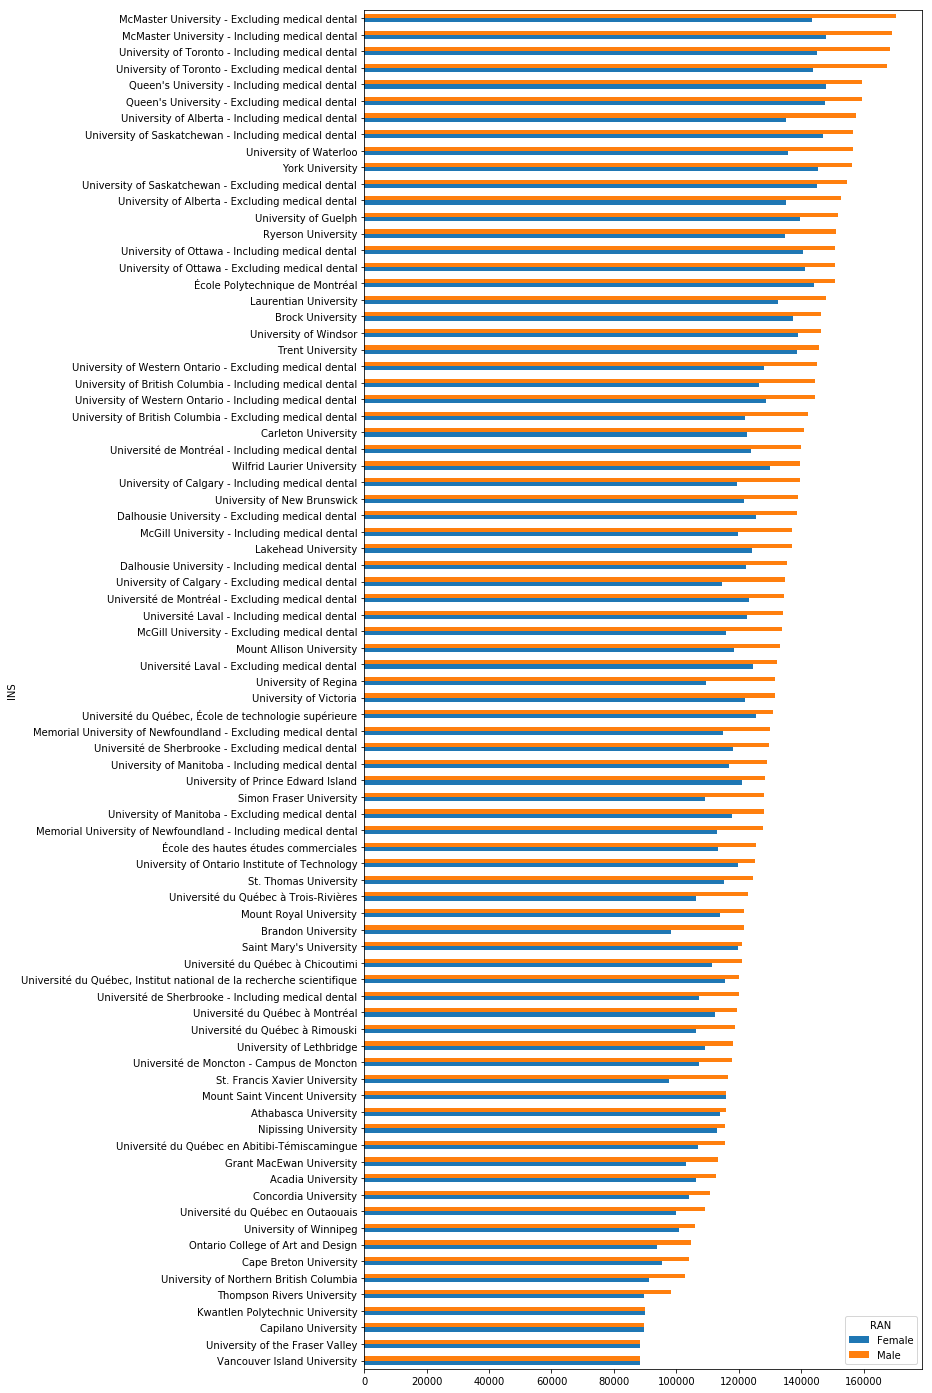

In [25]:
data_men_women_median_mean.plot(kind='barh',figsize=(10,25));